In [1]:
import sys, os

env_root = '/N/project/baby_vision_curriculum/pythonenvs/hfenv/lib/python3.10/site-packages/'
sys.path.insert(0, env_root)

In [2]:
import numpy as np
import torch, torchvision
from torchvision import transforms as tr
# from torch import nn
# from torch.nn import functional as F
import os
# import random
# import time
from tqdm import tqdm
from pathlib import Path
# import math
import argparse
import pandas as pd
import warnings
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns


import transformers


In [12]:
result_root = '/N/project/baby_vision_curriculum/trained_models/generative/'

In [13]:
firststage_dir = result_root+'v2/'

In [14]:
result_files = [firststage_dir+item
               for item in os.listdir(firststage_dir)
               if item.split('_')[0]=='train']
result_files

['/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g2_seed_1111mask50_small2_30ep',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g2_seed_100010ep.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g2_seed_800030ep.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g0_seed_1111mask50_small2_30ep',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g2_seed_1123mask50_small2',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g0_seed_1123mask50_small2',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g0_seed_800030ep.csv']

In [17]:
secondstage_dir = firststage_dir+'s2/'

In [18]:
result_files = [secondstage_dir+item
               for item in os.listdir(secondstage_dir)
               if item.split('_')[0]=='train']
result_files

['/N/project/baby_vision_curriculum/trained_models/generative/v2/s2/train_val_scores_g1_seed_1133mask50_small2_pre.g2',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/s2/train_val_scores_g1_seed_1133mask50_small2_pre.g0',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/s2/train_val_scores_g1_seed_1122mask50_small2_pre.g2_30ep',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/s2/train_val_scores_g2_seed_8000mask50_small2_pre.g0_30ep.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/s2/train_val_scores_g0_seed_1000mask50_small2_pre.g2_10ep.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/s2/train_val_scores_g0_seed_8000mask50_small2_pre.g2_30ep.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/s2/train_val_scores_g1_seed_1122mask50_small2_pre.g0_30ep']

In [8]:
thirdstage_dir = firststage_dir+'s3/'
result_files = [thirdstage_dir+item
               for item in os.listdir(thirdstage_dir)
               if item.split('_')[0]=='train']
result_files

['/N/project/baby_vision_curriculum/trained_models/generative/v2/s3/train_val_scores_g0_seed_2323mask50_small2_pre.g2g1.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/s3/train_val_scores_g2_seed_1122mask50_small2_pre.g2g0_10ep.csv',
 '/N/project/baby_vision_curriculum/trained_models/generative/v2/s3/train_val_scores_g2_seed_2323mask50_small2_pre.g0g1.csv']

In [8]:
# compare groups in each condition
# one subplot per stage

# differnt plot for ep
# stage, g, ep

## Short training (10 epochs)

In [20]:
# fp0 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g0_seed_1123mask50_small2'
fp0='/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g0_seed_800030ep.csv'
# fp2 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g2_seed_1123mask50_small2'
# fp2 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g2_seed_100010ep.csv'
fp2='/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g2_seed_800030ep.csv'

fp01 =  '/N/project/baby_vision_curriculum/trained_models/generative/v2/s2/train_val_scores_g1_seed_1133mask50_small2_pre.g0'
fp21 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/s2/train_val_scores_g1_seed_1133mask50_small2_pre.g2'
# fp20 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/s2/train_val_scores_g0_seed_1000mask50_small2_pre.g2_10ep.csv'
fp02='/N/project/baby_vision_curriculum/trained_models/generative/v2/s2/train_val_scores_g2_seed_8000mask50_small2_pre.g0_30ep.csv'
fp20='/N/project/baby_vision_curriculum/trained_models/generative/v2/s2/train_val_scores_g0_seed_8000mask50_small2_pre.g2_30ep.csv'

fp012 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/s3/train_val_scores_g2_seed_2323mask50_small2_pre.g0g1.csv'
fp210 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/s3/train_val_scores_g0_seed_2323mask50_small2_pre.g2g1.csv'

fp202 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/s3/train_val_scores_g2_seed_1122mask50_small2_pre.g2g0_10ep.csv'

In [21]:
fp_dicts1 = {'g0':fp0, 'g2': fp2}
fp_dicts2 = {'g0g2':fp02, 'g2g0': fp20}
# fp_dicts3 = {'g0g1g2':fp012, 'g2g1g0': fp210}
# fp_dicts1 = {'g2':fp2}
# fp_dicts2 = {'g2':fp2}
# fp_dicts1 = {'g2g0g2':fp2}
# fp_dicts2 = {'g2g0g2':fp20}
# fp_dicts3 = {'g2g0g2':fp202}

In [22]:
def add_protname_tocols(df, name):
    return df.rename(columns={'train_loss': name+'_train_loss', 'val_loss': name+'_val_loss'})

In [23]:
def combine_train_results_across_age(fp_dicts):
    df_list = []
    for prot_name, fp in fp_dicts.items():
        df = pd.read_csv(fp).iloc[:,1:]
        df = add_protname_tocols(df, prot_name)
        df_list.append(deepcopy(df))
    if len(df_list)>1:
        df_comb = pd.merge(*df_list, on='epoch')
    else:
        df_comb = df_list[0]
    return df_comb

In [25]:
xdf1 = combine_train_results_across_age(fp_dicts1)
xdf2 = combine_train_results_across_age(fp_dicts2)
# xdf3 = combine_train_results_across_age(fp_dicts3)

In [26]:
colors = ['#4caf50', '#2e7d32', '#f44336', '#8b0000']

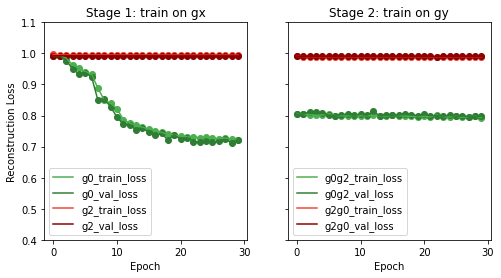

In [28]:
xdf_list = [xdf1, xdf2]#, xdf3]

ncol =  len(xdf_list)

fig,ax = plt.subplots(1,ncol, figsize=(ncol*4,4), sharey=True)
for i in range(ncol):
    cax = ax[i]
    cdata = xdf_list[i]
#     sns.lineplot(data=cdata, x='epoch', ax=cax)
    for i_line, colname in enumerate(cdata.columns[1:]):
        cax.plot(cdata['epoch'], cdata[colname], color=colors[i_line], label=colname)
        cax.scatter(cdata['epoch'], cdata[colname], color=colors[i_line])
    cax.legend()
    cax.set_ylim([0.4,1.1])
    cax.set_xlabel('Epoch')
ax[0].set_ylabel('Reconstruction Loss')
ax[0].set_title('Stage 1: train on gx')
ax[1].set_title('Stage 2: train on gy')
if ncol>2:
    ax[2].set_title('Stage 3: train on gz')

## Long training (30 epochs)

In [67]:
fp0 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g0_seed_1111mask50_small2_30ep'
fp2 = '/N/project/baby_vision_curriculum/trained_models/generative/v2/train_val_scores_g2_seed_1111mask50_small2_30ep'

fp01 = '/N/project/baby_vision_curriculum/trained_models/generative/v2m/train_val_scores_g1_seed_1122mask50_small2_pre.g0_30ep'
fp21 = '/N/project/baby_vision_curriculum/trained_models/generative/v2m/train_val_scores_g1_seed_1122mask50_small2_pre.g2_30ep'

In [68]:
fp_dicts1 = {'g0':fp0, 'g2': fp2}
fp_dicts2 = {'g0g1':fp01, 'g2g1': fp21}

In [69]:
xdf1 = combine_train_results_across_age(fp_dicts1)
xdf2 = combine_train_results_across_age(fp_dicts2)

Text(0.5, 1.0, 'Stage 2: train on g1')

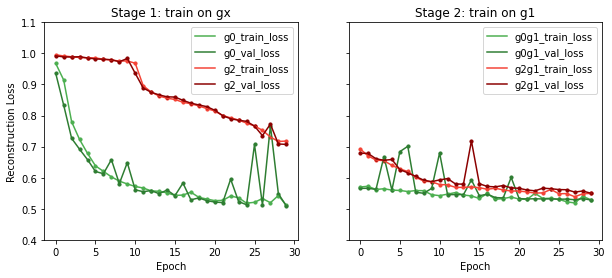

In [70]:
xdf_list = [xdf1, xdf2]

ncol = 2
fig,ax = plt.subplots(1,2, figsize=(10,4), sharey=True)
for i in range(ncol):
    cax = ax[i]
    cdata = xdf_list[i]
#     sns.lineplot(data=cdata, x='epoch', ax=cax)
    for i_line, colname in enumerate(cdata.columns[1:]):
        cax.plot(cdata['epoch'], cdata[colname], color=colors[i_line], label=colname)
        cax.scatter(cdata['epoch'], cdata[colname], color=colors[i_line], s=10)
    cax.legend()
    cax.set_ylim([0.4,1.1])
    cax.set_xlabel('Epoch')
ax[0].set_ylabel('Reconstruction Loss')
ax[0].set_title('Stage 1: train on gx')
ax[1].set_title('Stage 2: train on g1')